# 基于SVM实现Fashion MNIST数据集分类




2022217387 杨竣答 计科22-2班

## 一、导入必要的库和数据集

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
# 加载Fashion MNIST数据集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

## 二、查看数据的规格及类别分布情况

In [62]:
print("训练集规模:")
print("图像数据:", x_train.shape)
print("标签数据:", y_train.shape)

print("\n测试集规模:")
print("图像数据:", x_test.shape)
print("标签数据:", y_test.shape)

训练集规模:
图像数据: (60000, 784)
标签数据: (60000,)

测试集规模:
图像数据: (10000, 784)
标签数据: (10000,)


训练集标签示例： [9 0 0 3 0 2 7 2 5 5]
测试集标签示例： [9 2 1 1 6 1 4 6 5 7]


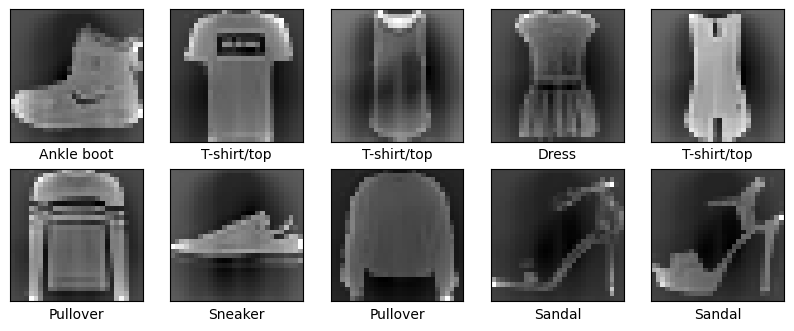

In [63]:
# 查看数据集的标签
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("训练集标签示例：", y_train[:10])
print("测试集标签示例：", y_test[:10])

# 可视化训练集中的前10个图像及其标签
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

## 三、数据预处理

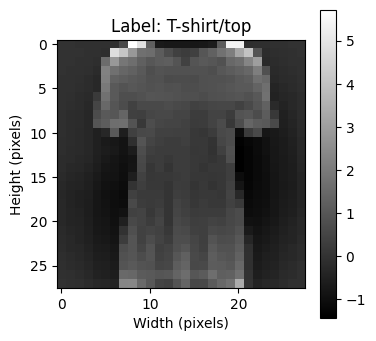

In [ ]:
# 标准化数据
x_train = x_train / 255.0
x_test = x_test / 255.0

# 展平数据
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# 标准化特征
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 选择一个示例
example = 10

# 设置图像大小
plt.figure(figsize=(4, 4))  # 调整figsize参数来缩小图像大小

# 显示图像
plt.imshow(x_train[example].reshape(28, 28), cmap='gray')
plt.title(f'Label: {class_names[y_train[example]]}')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.colorbar()
plt.show()

## 四、训练模型

In [ ]:
# 初始化SVM模型
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# 训练SVM模型
svm_model.fit(x_train_flattened, y_train)

SVC(kernel='linear', random_state=42)

## 五、评估模型

（1）分类报告

In [ ]:
# 预测测试集
y_pred = svm_model.predict(x_test_flattened)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report_Yang Junda:")
print(report)

Accuracy: 0.837
Classification Report_Yang Junda:
              precision    recall  f1-score   support

 T-shirt/top       0.75      0.81      0.78      1000
     Trouser       0.96      0.96      0.96      1000
    Pullover       0.72      0.75      0.74      1000
       Dress       0.83      0.83      0.83      1000
        Coat       0.75      0.77      0.76      1000
      Sandal       0.91      0.92      0.92      1000
       Shirt       0.62      0.56      0.59      1000
     Sneaker       0.92      0.93      0.93      1000
         Bag       0.96      0.90      0.93      1000
  Ankle boot       0.94      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



（2）混淆矩阵

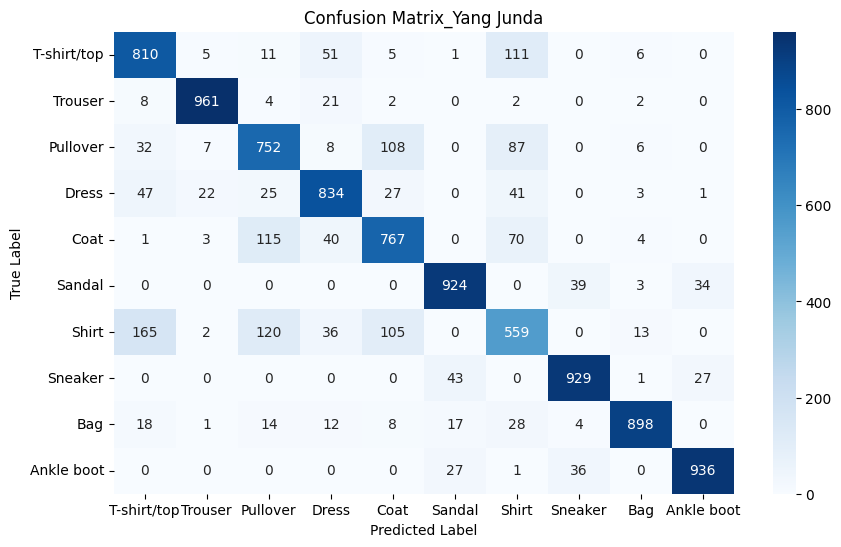

In [54]:
# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(10, 6))  # 调整figsize参数来设置图像大小
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix_Yang Junda')
plt.show()

（3）学习曲线

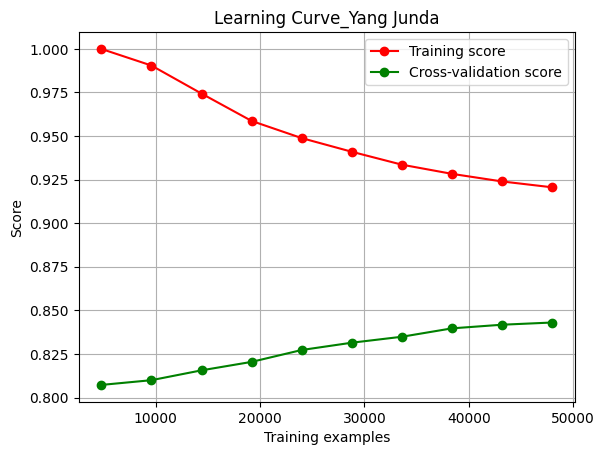

In [ ]:
from sklearn.model_selection import learning_curve

# 绘制学习曲线
train_sizes, train_scores, valid_scores = learning_curve(svm_model, x_train_flattened, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve_Yang Junda')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

## 五、预测结果的可视化

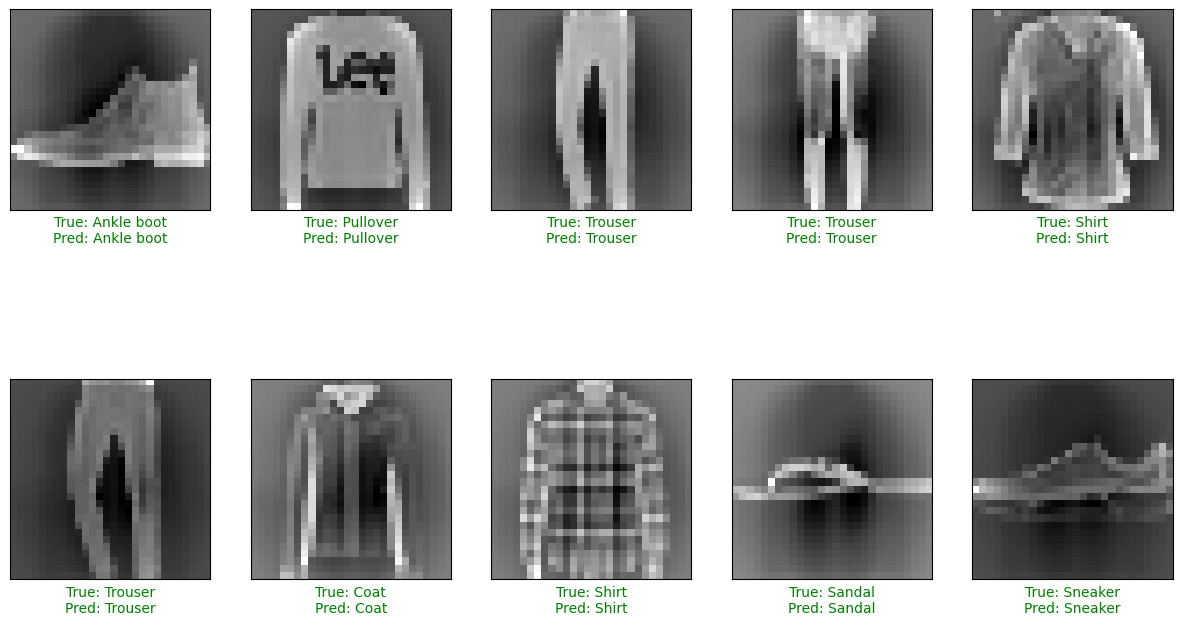

In [59]:
# 定义类别名称
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 可视化前10个测试样本及其预测结果
plt.figure(figsize=(15, 8))  # 调整figsize参数来设置图像大小
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # 重新调整为28x28的形状
    
    # 设置字体颜色
    color = 'green' if y_test[i] == y_pred[i] else 'red'
    plt.xlabel(f"True: {class_names[y_test[i]]}\nPred: {class_names[y_pred[i]]}", color=color)

# 调整行间距
plt.subplots_adjust(hspace=0.5)
plt.show()
